<a href="https://colab.research.google.com/github/sumedhasjs/DoS-and-DDoS-Attack-Detection/blob/main/DoS_Attack_SD_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


In [3]:
!ls 'FYP Dataset'

DDoS1.csv   Idle12.csv	Idle20.csv  Idle7.csv	   Working16.csv  Working5.csv
DDoS2.csv   Idle13.csv	Idle21.csv  Idle8.csv	   Working17.csv  Working6.csv
DDoS3.csv   Idle14.csv	Idle22.csv  Idle9.csv	   Working18.csv  Working7.csv
DDoS4.csv   Idle15.csv	Idle23.csv  Working10.csv  Working19.csv  Working8.csv
DoS1.csv    Idle16.csv	Idle2.csv   Working11.csv  Working1.csv   Working9.csv
DoS2.csv    Idle17.csv	Idle3.csv   Working12.csv  Working20.csv
file.csv    Idle18.csv	Idle4.csv   Working13.csv  Working2.csv
Idle10.csv  Idle19.csv	Idle5.csv   Working14.csv  Working3.csv
Idle11.csv  Idle1.csv	Idle6.csv   Working15.csv  Working4.csv


In [4]:
import pandas as pd

In [5]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
working=pd.read_csv('FYP Dataset/Working1.csv')
working = working.sample(frac = 1)
print(len(working))
working=working[:3000]
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:3000]

8575
3042
4444


In [6]:
import numpy as np
import matplotlib.pyplot as plt

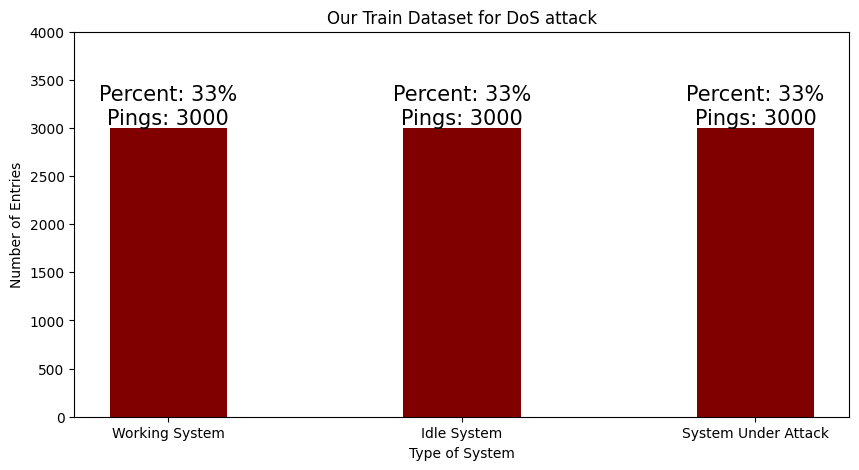

In [7]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "Percent: {}%\nPings: {}".format(int(percent),height),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
plt.ylim(0,4000 )
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Train Dataset for DoS attack")
plt.show()

In [8]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [9]:
ls=[working,idle,attack]
dataset_train=pd.concat(ls)

In [10]:
len(dataset_train)

9000

In [11]:
dataset_train = dataset_train.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_train = dataset_train.reset_index(drop = True)
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,TCP,192.168.29.50,3.0.71.181,49396.0,443.0,32,"13,066 Bytes","14,903 Bytes",2.6 KB/Sec,00:04.8,-1
1,TCP,192.168.29.50,13.35.210.37,62210.0,443.0,28,"3,315 Bytes","4,992 Bytes",1.0 KB/Sec,00:03.4,-1
2,TCP,192.168.29.50,91.108.56.175,50428.0,443.0,"6,164","2,803,849 Bytes","3,052,442 Bytes",47.1 KB/Sec,00:58.1,-1
3,UDP,192.168.29.184,239.255.255.250,57447.0,1900.0,2,643 Bytes,"1,020 Bytes",0.0 KB/Sec,52:02.3,-1
4,UDP,192.168.29.184,239.255.255.250,42760.0,1900.0,2,568 Bytes,936 Bytes,0.0 KB/Sec,44:02.1,-1


In [12]:
dataset_train['Throughput']=0
dataset_train["Duration in seconds"] = 0

In [13]:
import string
from datetime import datetime
for i in range(len(dataset_train)):
  t = datetime.strptime(dataset_train["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_train["Packets"][i])==int or type(dataset_train["Packets"][i])==float):
    dataset_train["Packets"][i] = dataset_train["Packets"][i]
  else:
    if(type(dataset_train["Packets"][i])==str):
      dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i].split(' ')[0])
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i])

<ipython-input-13-22298153ade2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-13-22298153ade2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-13-22298153ade2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [14]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,3.0.71.181,49396.0,443.0,32,"13,066 Bytes","14,903 Bytes",2.6 KB/Sec,00:04.8,-1,0,4
1,TCP,192.168.29.50,13.35.210.37,62210.0,443.0,28,"3,315 Bytes","4,992 Bytes",1.0 KB/Sec,00:03.4,-1,0,3
2,TCP,192.168.29.50,91.108.56.175,50428.0,443.0,6164,"2,803,849 Bytes","3,052,442 Bytes",47.1 KB/Sec,00:58.1,-1,0,58
3,UDP,192.168.29.184,239.255.255.250,57447.0,1900.0,2,643 Bytes,"1,020 Bytes",0.0 KB/Sec,52:02.3,-1,0,3122
4,UDP,192.168.29.184,239.255.255.250,42760.0,1900.0,2,568 Bytes,936 Bytes,0.0 KB/Sec,44:02.1,-1,0,2642


In [15]:
for i in range(len(dataset_train)):
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_train["Throughput"][i] = val

<ipython-input-15-ad44b00ee02e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Throughput"][i] = val
<ipython-input-15-ad44b00ee02e>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]


In [16]:
dataset_train=dataset_train.sort_values(by=['Throughput'])

In [17]:
throughput=dataset_train['Throughput']

In [19]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [20]:
stdev = throughput.std()
mean = throughput.mean()
print(mean,stdev)

305111111111118.3 460480055156216.1


In [21]:
data=dataset_train["Throughput"].tolist()

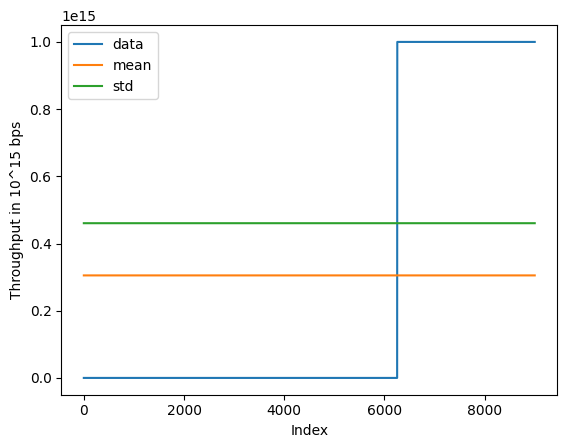

In [22]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.xlabel("Index")
plt.ylabel("Throughput in 10^15 bps")
plt.show()

In [23]:
dataset_train["Anomaly"] = 1
dataset_train.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_train["Total Size"])):
  if(abs(dataset_train["Throughput"][i]-mean)<stdev):
    dataset_train["Anomaly"][i] = -1

<ipython-input-23-409f2dd33fc5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Anomaly"][i] = -1


In [24]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score, f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"]).ravel()
precision = precision_score(dataset_train["Attack"], dataset_train["Anomaly"])
recall=recall_score(dataset_train["Attack"], dataset_train["Anomaly"])
accuracy = accuracy_score(dataset_train["Attack"], dataset_train["Anomaly"])
f1_score=f1_score(dataset_train["Attack"], dataset_train["Anomaly"])
ClassificationReport=classification_report(dataset_train["Attack"], dataset_train["Anomaly"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2746

False Positives:  0

True Negatives:  6000

False Negatives:  254

Accuracy:  0.9717777777777777

Precision:  1.0

Recall:  0.9153333333333333

F1 Score:  0.9557953358858337

Classification Report: 

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      6000
           1       1.00      0.92      0.96      3000

    accuracy                           0.97      9000
   macro avg       0.98      0.96      0.97      9000
weighted avg       0.97      0.97      0.97      9000



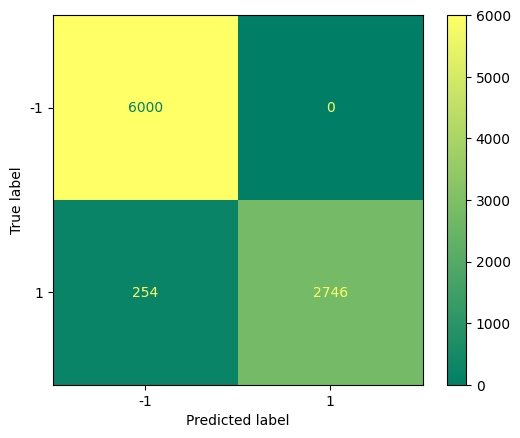

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_train["Attack"], dataset_train["Anomaly"],cmap='summer')

## Testing

In [28]:
attack=pd.read_csv('FYP Dataset/DoS1.csv')
attack=attack.append(pd.read_csv('FYP Dataset/DoS2.csv'))
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:3000]
print(len(attack))

12138
3000


<ipython-input-28-f8b7549f9ad2>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  attack=attack.append(pd.read_csv('FYP Dataset/DoS2.csv'))


In [29]:
working=pd.read_csv('FYP Dataset/Working1.csv')
working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working6.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working7.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working8.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working9.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working10.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working11.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working12.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working13.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working14.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working15.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working16.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working17.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working18.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working19.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))
working = working.sample(frac = 1)
print(len(working))
working=working[:60000]
print(len(working))

<ipython-input-29-29d2c14a72bd>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
<ipython-input-29-29d2c14a72bd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
<ipython-input-29-29d2c14a72bd>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
<ipython-input-29-29d2c14a72bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
<ipython-input-29-29d2c14a72bd>:6: FutureWarning: The frame.appe

60659
60000


<ipython-input-29-29d2c14a72bd>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  working=working.append(pd.read_csv('FYP Dataset/Working20.csv'))


In [30]:
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle6.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle7.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle8.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle9.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle10.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle11.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle12.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle13.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle14.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle15.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle16.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle17.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle18.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle19.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle20.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle21.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle22.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:37000]
print(len(idle))

<ipython-input-30-ecbdf109c35f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
<ipython-input-30-ecbdf109c35f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
<ipython-input-30-ecbdf109c35f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
<ipython-input-30-ecbdf109c35f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
<ipython-input-30-ecbdf109c35f>:6: FutureWarning: The frame.append method is deprecated and will be 

42950
37000


<ipython-input-30-ecbdf109c35f>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  idle=idle.append(pd.read_csv('FYP Dataset/Idle23.csv'))


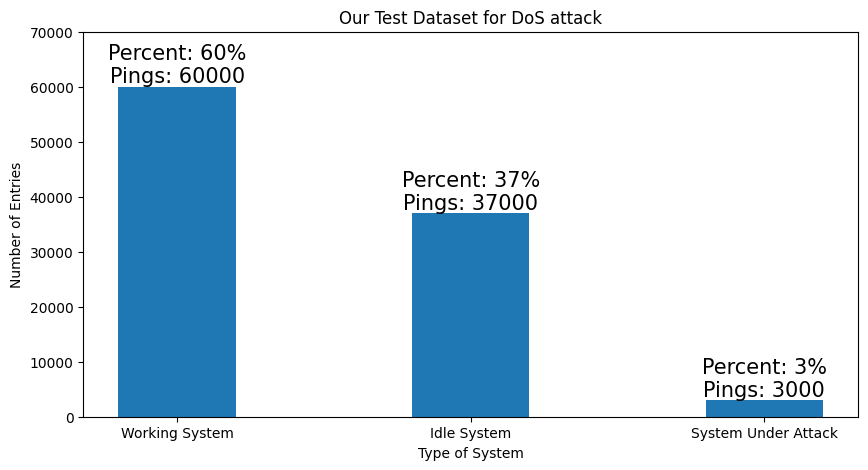

In [31]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries,
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "Percent: {}%\nPings: {}".format(int(percent),height),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
plt.ylim(0, 70000)
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Test Dataset for DoS attack")
plt.show()

In [32]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [33]:
ls=[working,idle,attack]
dataset_test=pd.concat(ls)

In [34]:
len(dataset_test)

100000

In [35]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
469,UDP,192.168.29.184,239.255.255.250,38144.0,1900.0,NaN,NaN,ssdp,2,696 Bytes,"1,128 Bytes",0.0 KB/Sec,12/14/2022 9:30:33 AM:416,12/14/2022 10:05:33 AM:218,34:59.8,-1
326,UDP,192.168.29.50,239.255.255.250,55701.0,1900.0,Sumedha,NaN,ssdp,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,12/24/2022 7:55:34 AM:045,12/24/2022 7:55:37 AM:082,00:03.0,-1
8639,UDP,192.168.29.50,192.168.29.1,53633.0,53.0,Sumedha,reliance.reliance,domain,8,464 Bytes,753 Bytes,0.0 KB/Sec,12/26/2022 4:49:31 PM:210,12/26/2022 5:45:47 PM:168,56:16.0,-1
10193,UDP,192.168.29.50,239.255.255.250,50538.0,1900.0,Sumedha,NaN,ssdp,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,12/24/2022 8:03:39 PM:054,12/24/2022 8:03:42 PM:086,00:03.0,-1
749,UDP,192.168.29.50,239.255.255.250,63231.0,1900.0,Sumedha,NaN,ssdp,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,12/11/2022 10:38:31 AM:079,12/11/2022 10:38:34 AM:110,00:03.0,-1


In [36]:
dataset_test = dataset_test.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_test = dataset_test.reset_index(drop = True)
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,192.168.29.184,239.255.255.250,38144.0,1900.0,2,696 Bytes,"1,128 Bytes",0.0 KB/Sec,34:59.8,-1
1,UDP,192.168.29.50,239.255.255.250,55701.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1
2,UDP,192.168.29.50,192.168.29.1,53633.0,53.0,8,464 Bytes,753 Bytes,0.0 KB/Sec,56:16.0,-1
3,UDP,192.168.29.50,239.255.255.250,50538.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1
4,UDP,192.168.29.50,239.255.255.250,63231.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1


In [37]:
dataset_test['Throughput']=0

In [38]:
dataset_test["Duration in seconds"] = 0

In [39]:
import string
from datetime import datetime
for i in range(len(dataset_test)):
  t = datetime.strptime(dataset_test["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_test["Packets"][i])==int or type(dataset_test["Packets"][i])==float):
    dataset_test["Packets"][i] = dataset_test["Packets"][i]
  else:
    if(type(dataset_test["Packets"][i])==str):
      dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i].split(' ')[0])
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i])

<ipython-input-39-ee91ebca76a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-39-ee91ebca76a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-39-ee91ebca76a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset

In [40]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,38144.0,1900.0,2,696 Bytes,"1,128 Bytes",0.0 KB/Sec,34:59.8,-1,0,2099
1,UDP,192.168.29.50,239.255.255.250,55701.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,0,3
2,UDP,192.168.29.50,192.168.29.1,53633.0,53.0,8,464 Bytes,753 Bytes,0.0 KB/Sec,56:16.0,-1,0,3376
3,UDP,192.168.29.50,239.255.255.250,50538.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,0,3
4,UDP,192.168.29.50,239.255.255.250,63231.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1,0,3


In [41]:
for i in range(len(dataset_test)):
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_test["Throughput"][i] = val

<ipython-input-41-f3b1ecf7bb72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Throughput"][i] = val
<ipython-input-41-f3b1ecf7bb72>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]


In [42]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,192.168.29.184,239.255.255.250,38144.0,1900.0,2,696 Bytes,"1,128 Bytes",0.0 KB/Sec,34:59.8,-1,0.000953,2099
1,UDP,192.168.29.50,239.255.255.250,55701.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,2.666667,3
2,UDP,192.168.29.50,192.168.29.1,53633.0,53.0,8,464 Bytes,753 Bytes,0.0 KB/Sec,56:16.0,-1,0.002370,3376
3,UDP,192.168.29.50,239.255.255.250,50538.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,2.666667,3
4,UDP,192.168.29.50,239.255.255.250,63231.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.4 KB/Sec,00:03.0,-1,2.666667,3


In [43]:
dataset_test=dataset_test.sort_values(by=['Throughput'])

In [44]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
87062,UDP,192.168.29.184,239.255.255.250,44291.0,1900.0,2,622 Bytes,"1,044 Bytes",0.0 KB/Sec,59:59.6,-1,0.000556,3599
28679,UDP,192.168.29.184,239.255.255.250,51186.0,1900.0,2,634 Bytes,"1,068 Bytes",0.0 KB/Sec,59:59.8,-1,0.000556,3599
93033,UDP,192.168.29.184,239.255.255.250,60115.0,1900.0,2,622 Bytes,"1,044 Bytes",0.0 KB/Sec,59:59.8,-1,0.000556,3599
19483,UDP,192.168.29.184,239.255.255.250,42204.0,1900.0,2,688 Bytes,"1,120 Bytes",0.0 KB/Sec,59:59.8,-1,0.000556,3599
93039,UDP,192.168.29.184,239.255.255.250,42356.0,1900.0,2,688 Bytes,"1,112 Bytes",0.0 KB/Sec,59:59.9,-1,0.000556,3599


In [45]:
throughput=dataset_test['Throughput']

In [46]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [47]:
data=dataset_test["Throughput"].tolist()

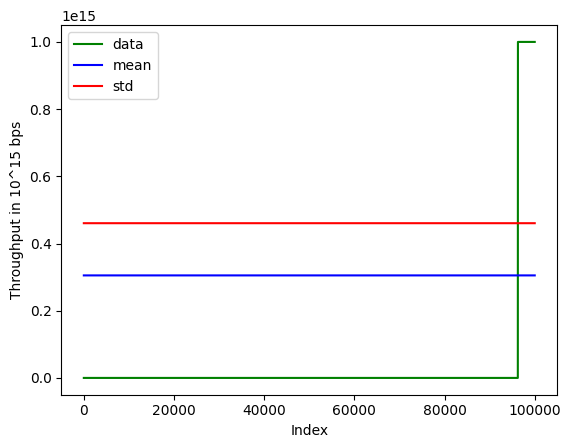

In [48]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot( color="gbr")
plt.xlabel("Index")
plt.ylabel("Throughput in 10^15 bps")
plt.show()

In [49]:
dataset_test["Anomaly"] = 1
dataset_test.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_test["Total Size"])):
  if(abs(dataset_test["Throughput"][i]-mean)<stdev):
    dataset_test["Anomaly"][i] = -1

<ipython-input-49-f9ec2a4c19b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly"][i] = -1


In [50]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,recall_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly"])
recall=recall_score(dataset_test["Attack"], dataset_test["Anomaly"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly"])
ClassificationReport=classification_report(dataset_test["Attack"], dataset_test["Anomaly"])
print("True Positives: ",tp)
print("\nFalse Positives: ",fp)
print("\nTrue Negatives: ",tn)
print("\nFalse Negatives: ",fn)
print("\nAccuracy: ",accuracy)
print("\nPrecision: ",precision)
print("\nRecall: ",recall)
print("\nF1 Score: ",f1_score)
print("\nClassification Report: \n")
print(ClassificationReport)

True Positives:  2846

False Positives:  904

True Negatives:  96096

False Negatives:  154

Accuracy:  0.98942

Precision:  0.7589333333333333

Recall:  0.9486666666666667

F1 Score:  0.8432592592592593

Classification Report: 

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99     97000
           1       0.76      0.95      0.84      3000

    accuracy                           0.99    100000
   macro avg       0.88      0.97      0.92    100000
weighted avg       0.99      0.99      0.99    100000



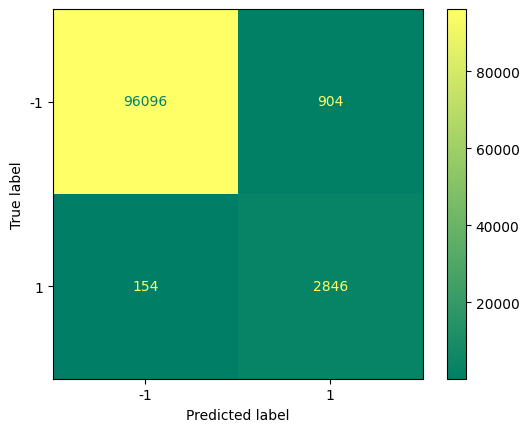

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"])
disp_poly = ConfusionMatrixDisplay.from_predictions(dataset_test["Attack"], dataset_test["Anomaly"],cmap='summer')